To see more of these notebooks [link](https://jmsevillam.github.io/R_basics/)
#  Example 2: Two dices

---

Suppose you have two a fair dice, it is the same to throw a dice twice than throw two dices once, so we are going to define just a sequence of points which will correspond to a dice

In [1]:
dice=seq(1,6)
dice

[1] 1 2 3 4 5 6

We have the six options, the results of throwing the dice, can be simulated with the function `sample`

In [16]:
n_rep=10000
test1=sample(dice,n_rep,replace=T)

If we want to see the first 50 results

In [3]:
test1[1:50]

[1] 5 4 1 6 3 6 6 3 4 1 2 6 5 1 4 5 5 2 5 5 4 5 1 1 5 2 5 3 2 2 5 3 5 3 1 4 3 3
[39] 3 5 6 3 1 5 5 4 1 6 4 2

If the dice is fair, (So we are simulating correctly), we expect to have _the same_ frequencies for the six numbers. The best way yo visualize that is doing a histogram,

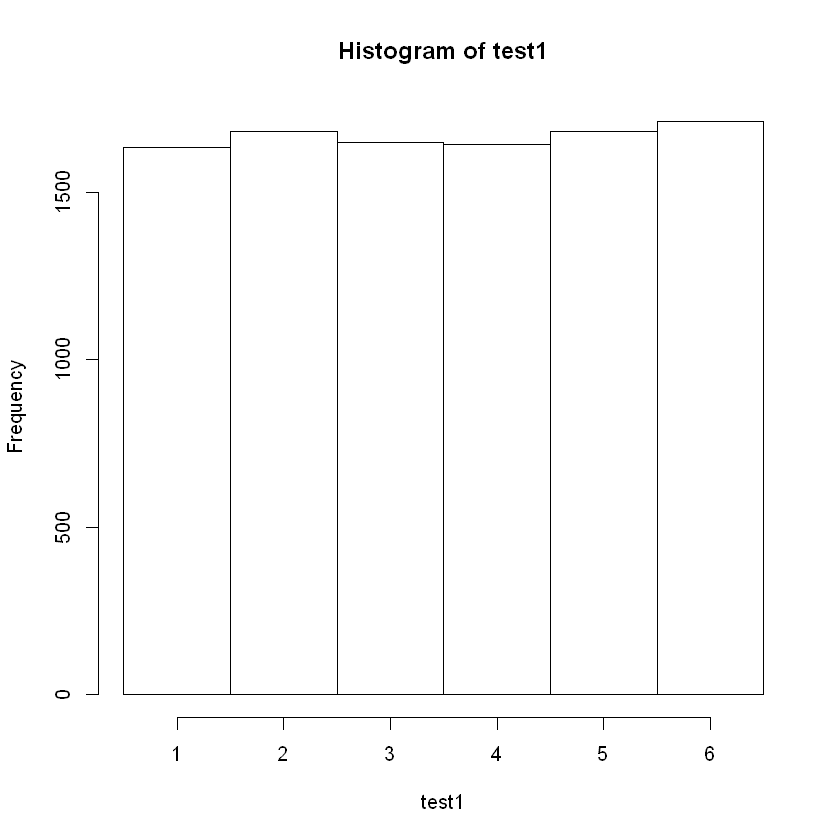

In [4]:
hist(test1,breaks = seq(0,6)+0.5)

This histogram is very particular because a difference of the ones we had done before, we are using the parameter `breaks = seq(0,6)+0.5`, the reason for that, is that `R` will choose the amount of bins it plots on the histogram, and as on our case we have discrete values it is meaningless to have more bins than values so we forced it to build the histogram counting all the values between $0.5$ and $1.5$ for the first bin, from $1.5$ to $2.5$ for the second and so on, to see more clearly this, let us plot the vector which we passed as parameter of the option `breaks`.

In [5]:
print(seq(0,6)+0.5)

[1] 0.5 1.5 2.5 3.5 4.5 5.5 6.5


We could have used a different `breaks` sequence in order to get _better_ visualization, for instance 

In [6]:
print(seq(0,6,0.5)+0.25)

 [1] 0.25 0.75 1.25 1.75 2.25 2.75 3.25 3.75 4.25 4.75 5.25 5.75 6.25


So it look like we have thinner bars,

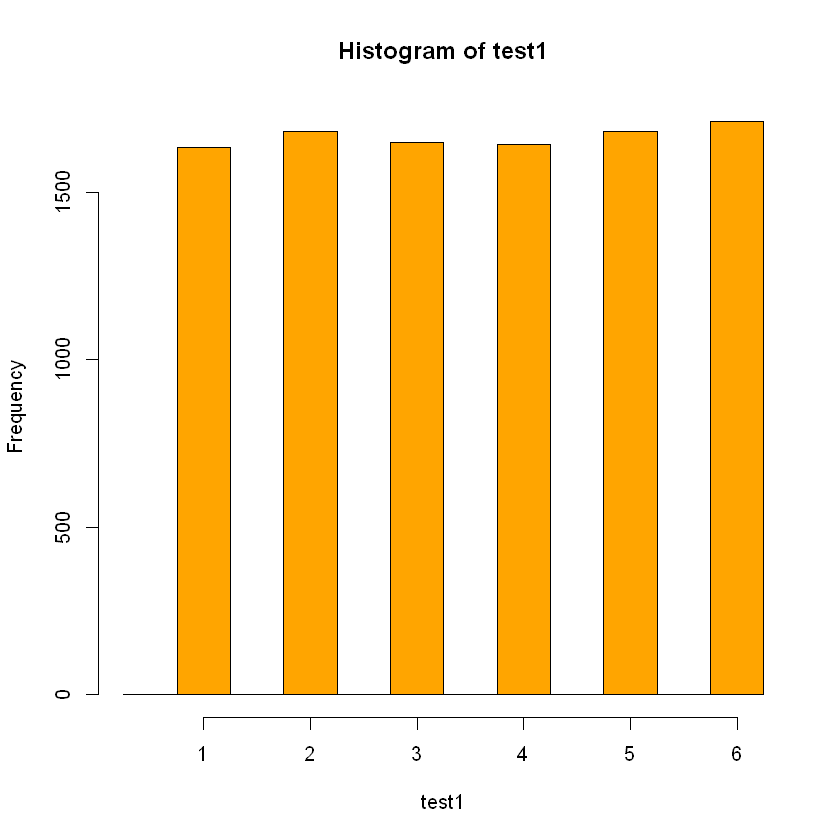

In [7]:
hist(test1,breaks = seq(0,6,0.5)+0.25,col="orange")

This plots still look very poor, but we will get to styling those plots using `ggplot`, which is bigger than just for `R`.

---

Now let us construct the throws for the second dice,

In [8]:
test2=sample(dice,n_rep,replace=T)

We can ask ourselves for the frequencies of occurrence of events involving the two dices, for instance, how frequent we got $2$ on both dices. To get that information, we may use boolean or comparison operators, so first we should select those sequences such that the result of the dice 1 is $2$. (Let us print just the first 20 just not to get unreadable output)

In [9]:
(test1==2)[1:20]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[13] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE

and the same for the second dice

In [10]:
(test2==2)[1:20]

[1]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

But we want to combine them!, as we want to have the number of times the two of them are two, we need to evaluate where the two previous sequences are `TRUE` at the same position, but fortunately that is what the logical operator `&` does

In [11]:
(test1 == 2 & test2 ==2)[1:20]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

as the `TRUE` values are considered to be numerically $1$ and the `FALSE` $0$, we can count how many times we got `TRUE` on both cases by using the `sum function`

In [12]:
sum(test1 == 2 & test2 == 2)

[1] 282

But to get a proportion of the times both conditions are satisfied out of how many throws we did, we may divide this by the total number we simulated 

In [13]:
sum(test1 == 2 & test2 == 2)/n_rep

[1] 0.0282

And theoretically it should be

In [14]:
1/(6*6)

[1] 0.02777778

let us now, test how close these two values can be, depending on the number of repetitions we do, so

In [15]:
for (n_rep in c(10,100,1000,10000,20000,30000,40000,50000,100000,200000,300000,400000,500000,1000000))
{
    test1=sample(dice,n_rep,replace=T)
    test2=sample(dice,n_rep,replace=T)
    cat(n_rep,sum(test1 == 2 & test2 == 2)/n_rep,'\n')
}

10 0 
100 0.03 
1000 0.019 
10000 0.0276 
20000 0.02625 
30000 0.02906667 
40000 0.0283 
50000 0.02852 
1e+05 0.02732 
2e+05 0.027795 
3e+05 0.02775 
4e+05 0.0280925 
5e+05 0.02762 
1e+06 0.027758 


On principle, each one of these values should be averaged on a set of similar simulations, but this is just for convince ourselves that the number of repetitions is the crucial part here 

This is the first time we want to _repeat_ a section of code but changing a little ingredient which in our case is the variable `n_rep`, let us explore this syntax with more detail, 

In [18]:
for (i in seq(0,10)){
    print(i)
}

[1] 0
[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [19]:
for(i in c("Hello","World")){
    print(i)
}

[1] "Hello"
[1] "World"


It works as follows, we need a sequence/list/vector/collection of something that can be numbers (`int`s or `double`s) or characters, and we go component by component on that _list_. So we save the value of the _list_ on a certain variable which in this case we called `i` and the computer evaluates the section of code enclosed on braces `{}`, and when it is finished, the variable `i` takes the next value on the _list_ and repeats until no more components are left. 

The amount of code that can be inside the braces `{}` does not have limits, it can be very large or just a single line just like we just did.

The `for` structure is not the only repetition structure on programming in general, but we will get to these structures later.

### Logical Operators

We just used `&` to compare when two lists had `TRUE` at the same position, but `R` has more of these operators.

Those operators of comparison `TRUE` or `FALSE` sentences are called _logical operators_. The possible _Logical operators_ available on `R` are,

| Operator 	| Description              	|
|:---------:|--------------------------	|
|    `!`   	| Logical NOT              	|
|    `&`   	| Element-wise logical AND 	|
|   `&&`   	| Logical AND              	|
|    `\|`   	| Element-wise logical OR  	|
|   `\|\|`   	| Logical OR               	|



the difference between `&` and `&&` is that the first one is element wise so if we compare two vectors, we get a vector but if we use the second instead, it will only compare the firsts components, so a single value is the result

In [20]:
A=c(TRUE,TRUE,TRUE)
B=c(FALSE,TRUE,TRUE)

In [21]:
A & B

[1] FALSE  TRUE  TRUE

In [22]:
A && B

[1] FALSE

In [23]:
A=c(TRUE,TRUE,TRUE)
B=c(TRUE,FALSE,FALSE)

A&&B

[1] TRUE